In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('car-mpg.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [4]:
data['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [5]:
data['car_type'].value_counts()

car_type
1    211
0    187
Name: count, dtype: int64

In [6]:
data = data.drop('car_name',axis=1)

In [7]:
data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [8]:
data['origin'] = data['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [9]:
data = pd.get_dummies(data, columns=['origin'], dtype=int)  # One Hot Encoding

In [10]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [11]:
data.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [12]:
data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
data[data['hp'] == '?']

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,1,0,0


In [14]:
data['hp'].replace('?',np.NaN, inplace=True)
data['hp'] = data['hp'].astype('float64')

In [15]:
data['hp'].isnull().sum()

6

In [16]:
data['hp'] = data['hp'].fillna(data['hp'].median())

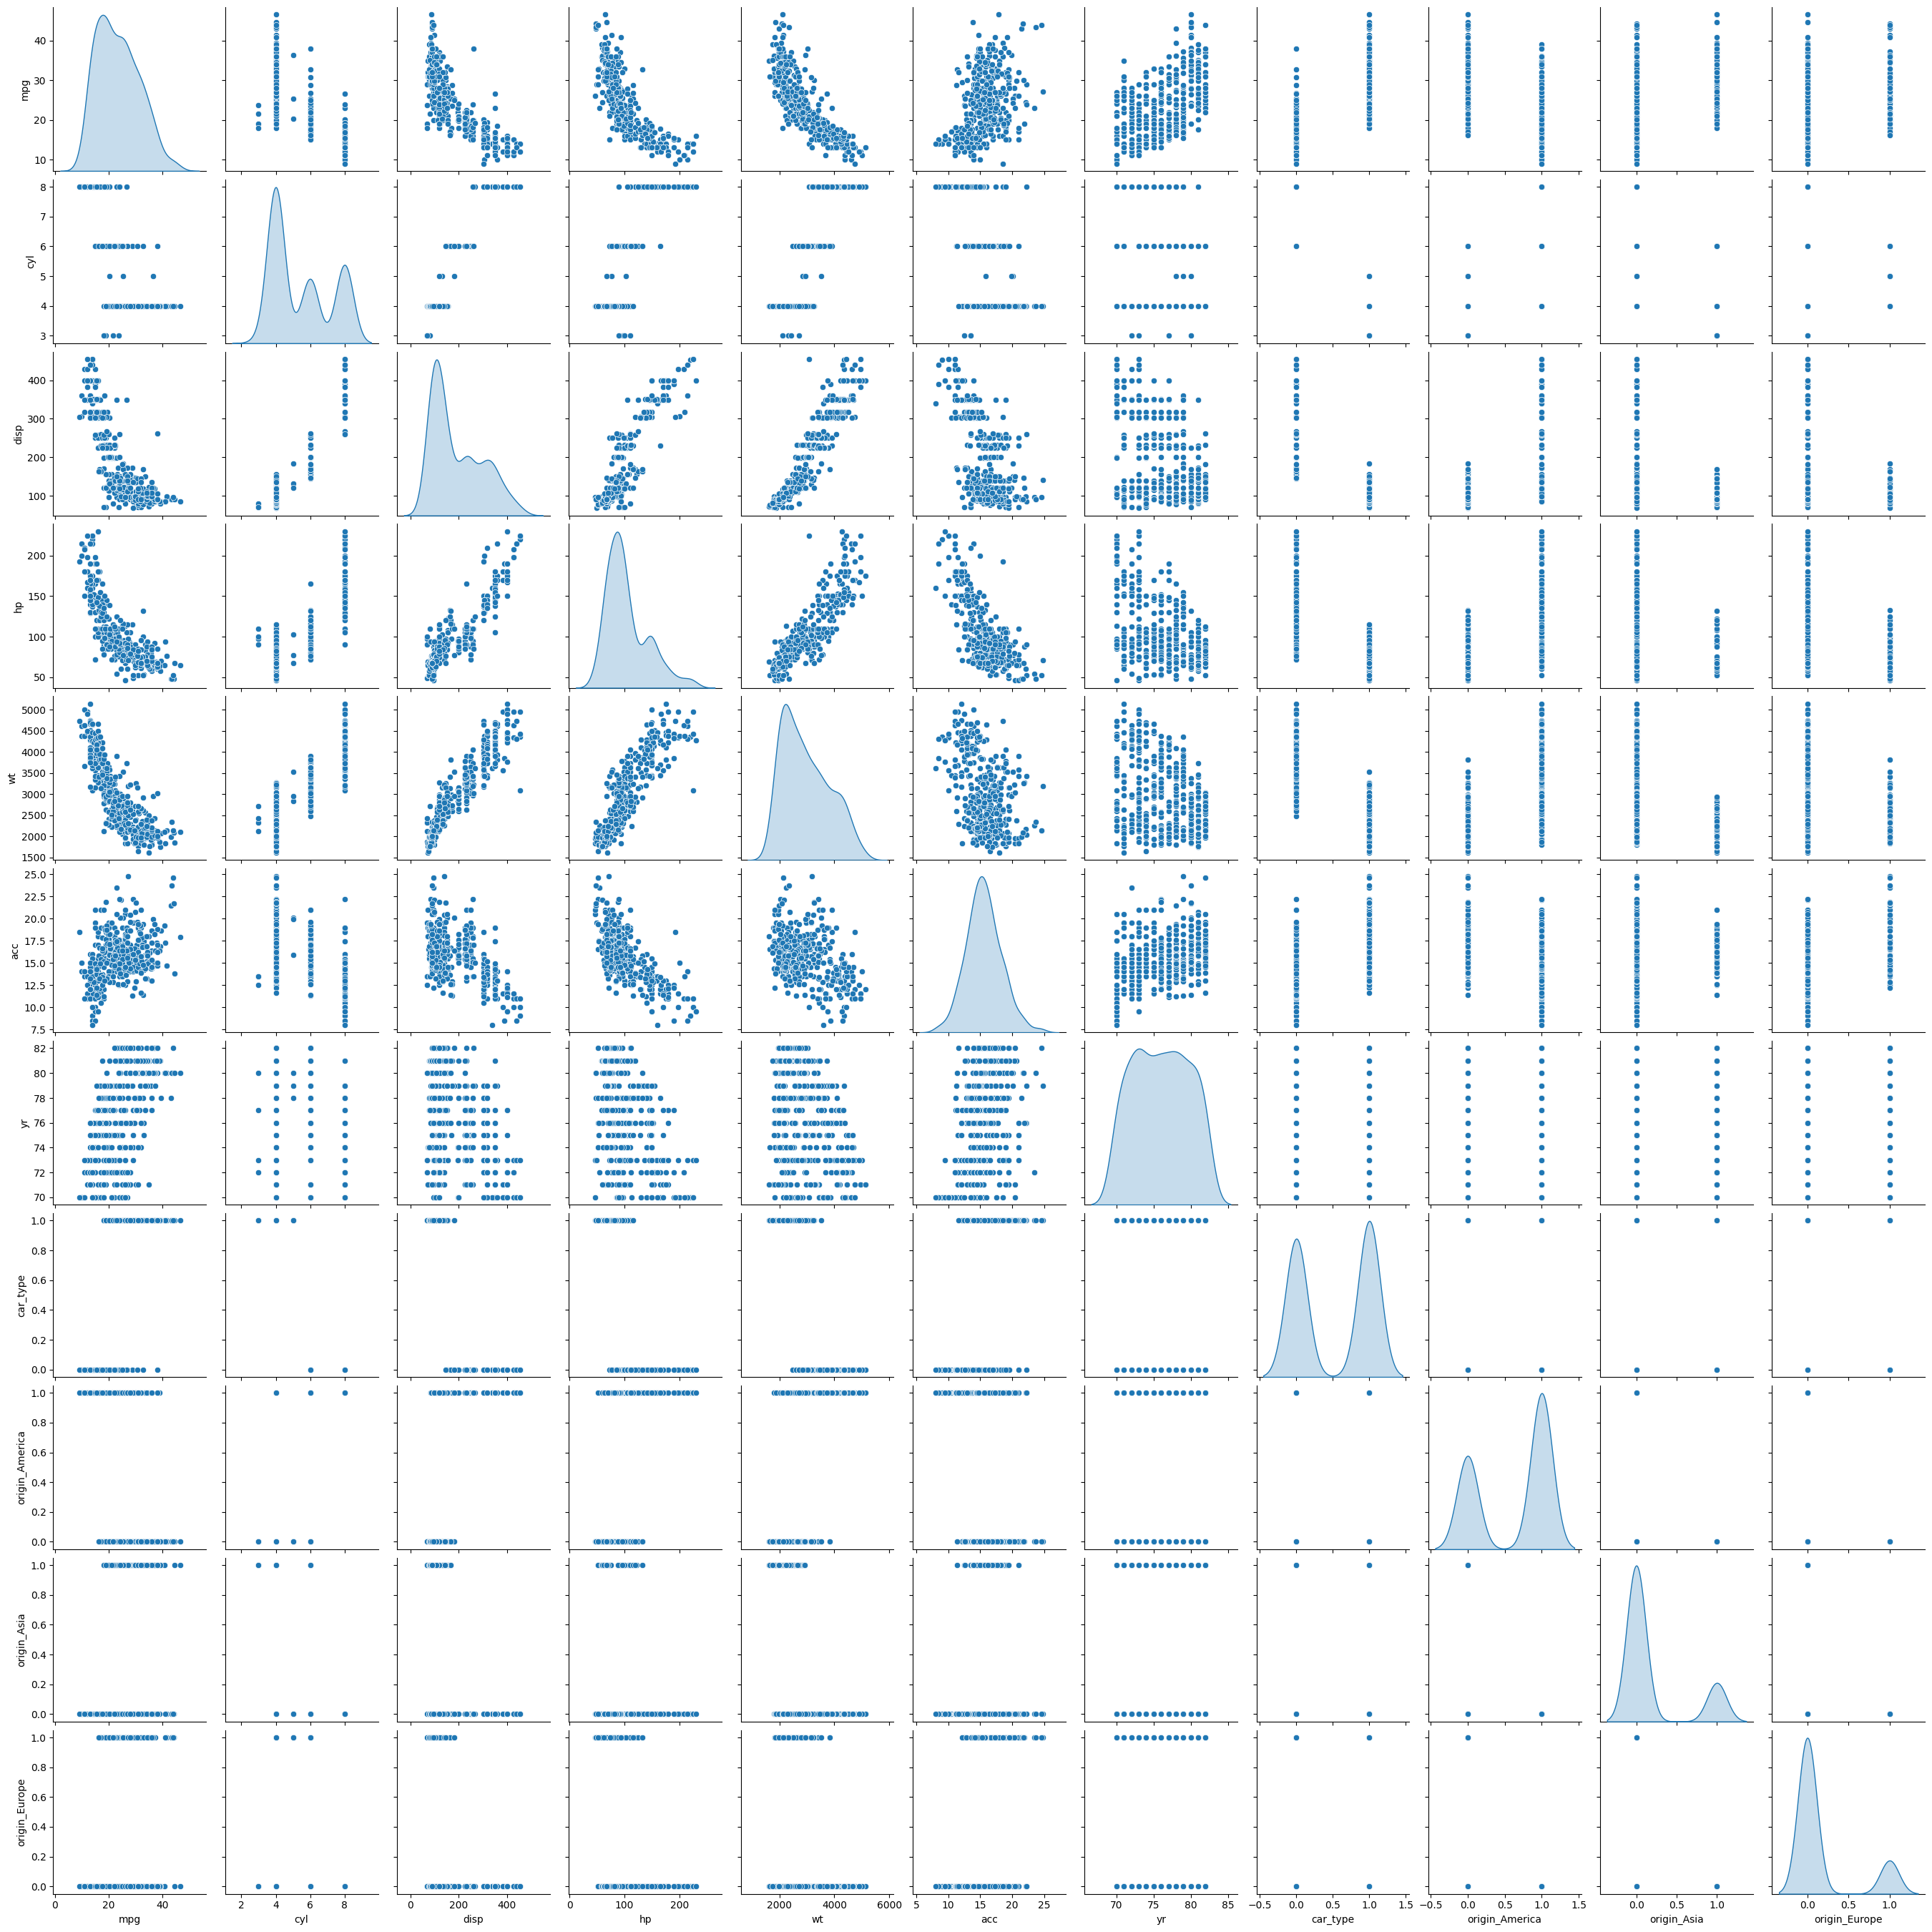

In [17]:
sns.pairplot(data, diag_kind='kde')
plt.show()

Data is ready. Let's create Linear Regression Model

In [18]:
# Creating X dataframe with independent variables. Except for 'mpg' everything
X = data.drop('mpg', axis=1)

# Create Y dataframe with 'mpg' variable
y = data[['mpg']]

In [19]:
# Let's split entire data in training and test.
from sklearn.model_selection import train_test_split

# 30% test data and 70% training data random split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [20]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [21]:
regression_model.coef_[0]

array([ 1.47507329,  0.02434932, -0.04686191, -0.00656416,  0.04170228,
        0.79389755,  5.96659744, -1.42434811,  0.65211192,  0.77223618])

In [22]:
dict(enumerate(X_train.columns))

{0: 'cyl',
 1: 'disp',
 2: 'hp',
 3: 'wt',
 4: 'acc',
 5: 'yr',
 6: 'car_type',
 7: 'origin_America',
 8: 'origin_Asia',
 9: 'origin_Europe'}

Coefficients of the independent variables of model

In [23]:
for idx, col_name in enumerate(X_train.columns):
    print(f" The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

 The coefficient for cyl is 1.4750732919168112
 The coefficient for disp is 0.024349322002431478
 The coefficient for hp is -0.04686191039325282
 The coefficient for wt is -0.006564163296278441
 The coefficient for acc is 0.04170227918810149
 The coefficient for yr is 0.7938975478841994
 The coefficient for car_type is 5.9665974398610375
 The coefficient for origin_America is -1.4243481095472263
 The coefficient for origin_Asia is 0.6521119249598722
 The coefficient for origin_Europe is 0.7722361845873535


Intercept

In [24]:
regression_model.intercept_[0]

-28.235395568497392

R2 or Coefficient of Determination

In [25]:
regression_model.score(X_test,y_test)

0.8513421387780064

Let's try to improve this. Since there are many dimensions, relationship is not really linear. Let's try polynomial models.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)  #  Creating new features by raising existing features to different powers and combining them. In this case max degree is 2

X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_,y_train)

y_pred = poly_clf.predict(X_test_)
poly_clf.score(X_test_,y_test)

0.8589495424697708

In [27]:
poly.get_feature_names_out()

array(['1', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type',
       'origin_America', 'origin_Asia', 'origin_Europe', 'cyl disp',
       'cyl hp', 'cyl wt', 'cyl acc', 'cyl yr', 'cyl car_type',
       'cyl origin_America', 'cyl origin_Asia', 'cyl origin_Europe',
       'disp hp', 'disp wt', 'disp acc', 'disp yr', 'disp car_type',
       'disp origin_America', 'disp origin_Asia', 'disp origin_Europe',
       'hp wt', 'hp acc', 'hp yr', 'hp car_type', 'hp origin_America',
       'hp origin_Asia', 'hp origin_Europe', 'wt acc', 'wt yr',
       'wt car_type', 'wt origin_America', 'wt origin_Asia',
       'wt origin_Europe', 'acc yr', 'acc car_type', 'acc origin_America',
       'acc origin_Asia', 'acc origin_Europe', 'yr car_type',
       'yr origin_America', 'yr origin_Asia', 'yr origin_Europe',
       'car_type origin_America', 'car_type origin_Asia',
       'car_type origin_Europe', 'origin_America origin_Asia',
       'origin_America origin_Europe', 'origin_Asia origin_Europe'],
    

In [28]:
poly_clf.coef_[0]

array([ 1.14820098e+08,  1.27400556e+01, -4.99890942e-01,  8.20706045e-01,
       -1.72250756e-02, -5.25946435e+00,  6.83465484e-01, -3.01156092e+01,
        2.73970059e+01, -4.54454703e+01,  1.80484644e+01, -4.32829376e-03,
       -2.33471116e-02,  1.30648607e-03,  5.76016616e-01, -3.75258281e-01,
        9.39056618e+00,  4.94131591e+00,  1.13600715e+01, -3.56133170e+00,
        2.20810057e-04, -3.15239459e-06, -1.80394815e-05,  7.76762895e-03,
        5.37168640e-03, -6.24886369e-02, -2.63018801e-01, -1.74383505e-01,
       -1.00124329e-05, -4.83734608e-03, -1.23160308e-02, -2.08887442e-02,
        2.49550516e-01,  3.13902787e-01,  2.57252742e-01, -2.77872476e-04,
        3.33592318e-04, -9.85861609e-03, -1.19090627e-02, -3.77166996e-03,
       -1.54434300e-03,  5.41751315e-02,  1.26872232e+00, -1.90272804e+00,
       -2.25962997e+00, -1.09710633e+00,  1.16424323e-01, -8.67366420e-02,
        4.58350397e-01,  3.11851729e-01, -8.95172329e+00, -2.22567233e-01,
       -2.09413187e+01,  

In [32]:
for i in range(len(poly_clf.coef_[0])):
    print(f"{poly.get_feature_names_out()[i]} --- {poly_clf.coef_[0][i]}")

1 --- 114820098.21944678
cyl --- 12.740055648152591
disp --- -0.49989094232778
hp --- 0.8207060446410358
wt --- -0.0172250756245437
acc --- -5.25946434547586
yr --- 0.6834654838837589
car_type --- -30.11560922051555
origin_America --- 27.397005861720494
origin_Asia --- -45.44547029874057
origin_Europe --- 18.048464437099586
cyl disp --- -0.004328293757191829
cyl hp --- -0.0233471115944692
cyl wt --- 0.0013064860736865585
cyl acc --- 0.5760166155778251
cyl yr --- -0.3752582809903954
cyl car_type --- 9.39056617665642
cyl origin_America --- 4.941315905769943
cyl origin_Asia --- 11.360071451914214
cyl origin_Europe --- -3.5613317025651776
disp hp --- 0.0002208100565503357
disp wt --- -3.152394591948715e-06
disp acc --- -1.803948145922933e-05
disp yr --- 0.007767628946541011
disp car_type --- 0.005371686397946301
disp origin_America --- -0.062488636917689674
disp origin_Asia --- -0.26301880065636923
disp origin_Europe --- -0.17438350506599956
hp wt --- -1.0012432860195819e-05
hp acc --- -0.

In [30]:
poly_clf.intercept_

array([-1.14820082e+08])

In [31]:
X_train_.shape

(278, 56)